Import libraries and dataset

In [ ]:
import matplotlib.pyplot as plt
from utils import DataLoader
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
load_dataset = "/content/drive/MyDrive/XAI Assignment 1/healthcare-dataset-stroke-data.csv"
data_loader = DataLoader()
data_loader.load_dataset(load_dataset)
data = data_loader.data

Data exploration

In [ ]:
# Show head
print(data.shape)
data.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Show general statistics
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


col:  id


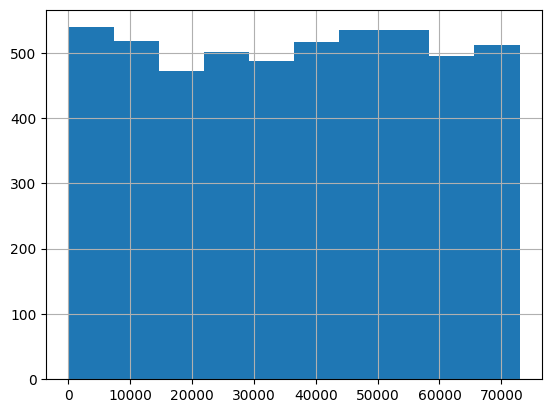

col:  gender


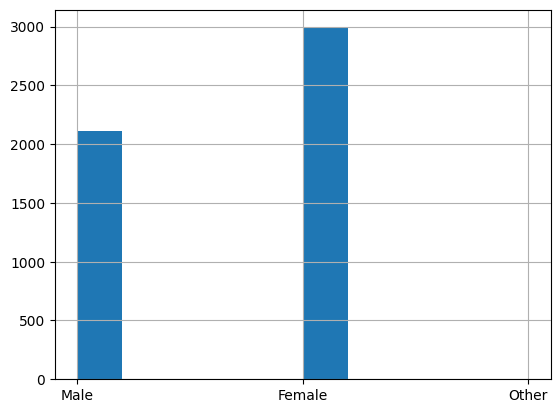

col:  age


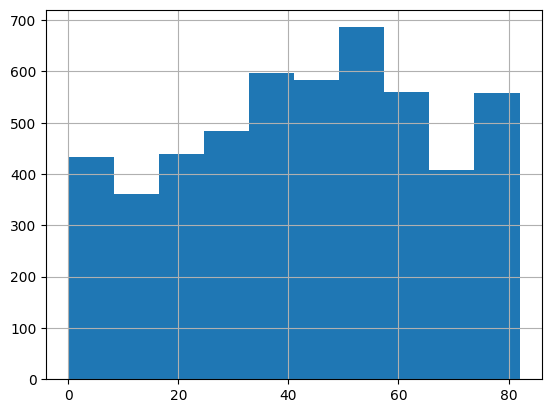

col:  hypertension


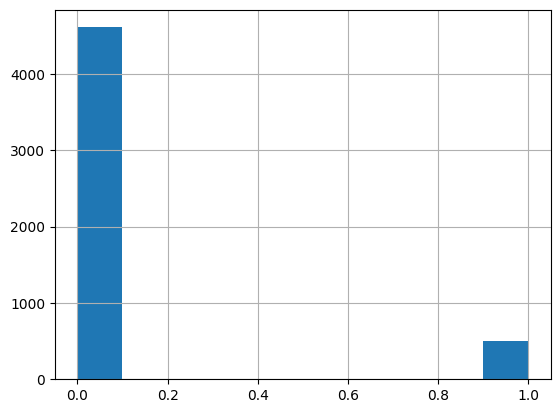

col:  heart_disease


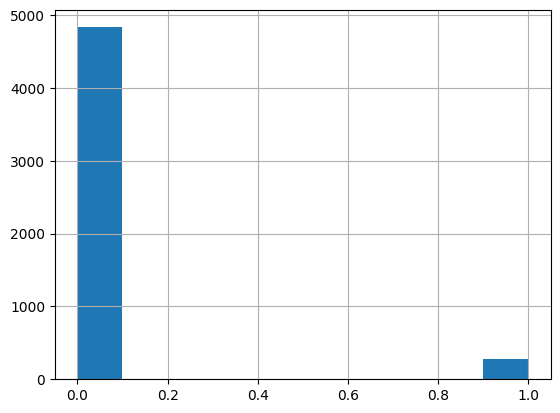

col:  ever_married


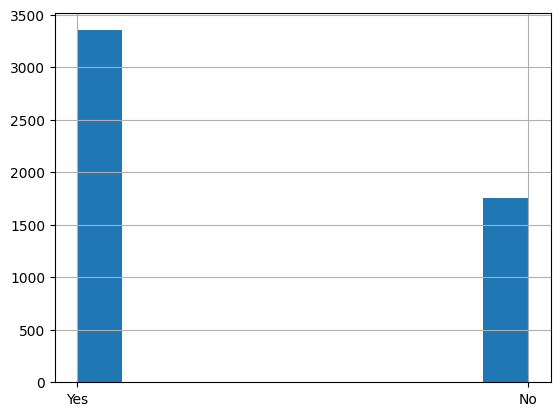

col:  work_type


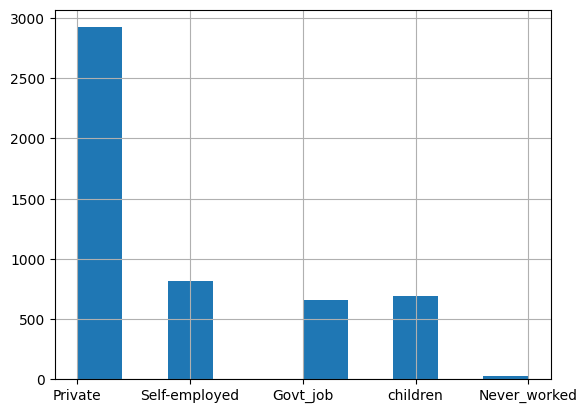

col:  Residence_type


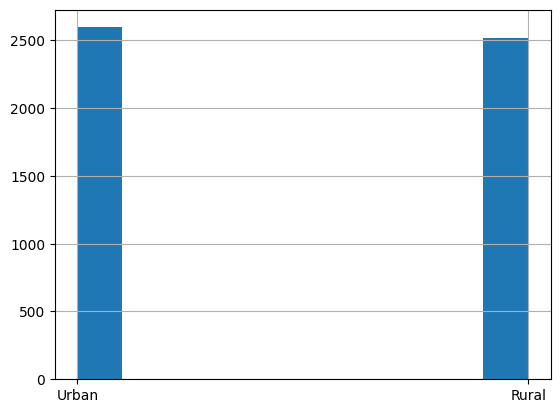

col:  avg_glucose_level


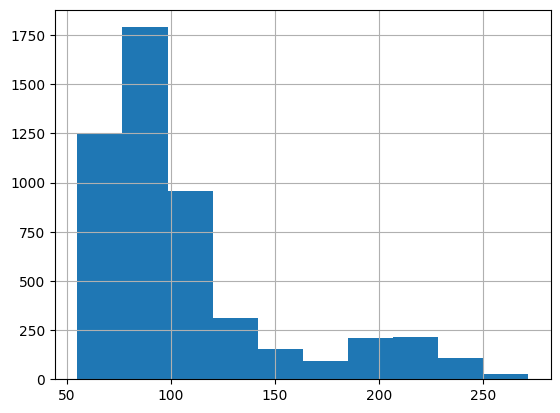

col:  bmi


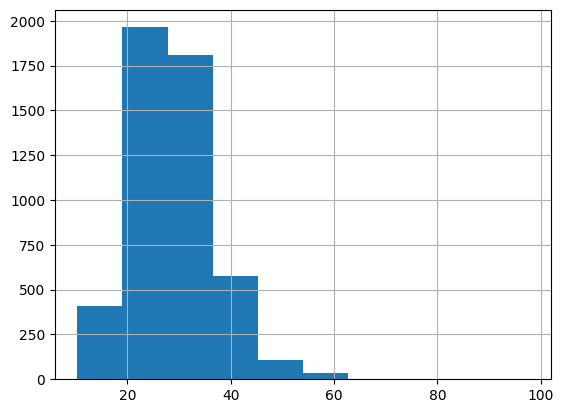

col:  smoking_status


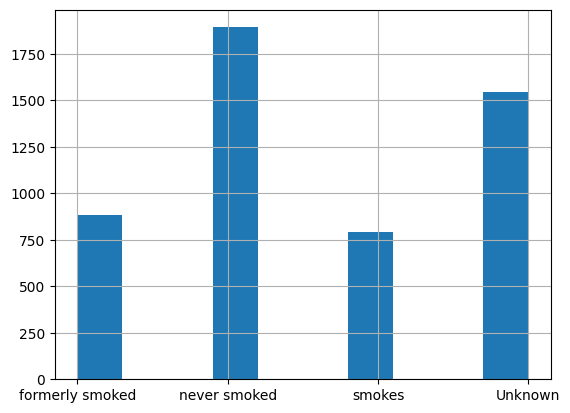

col:  stroke


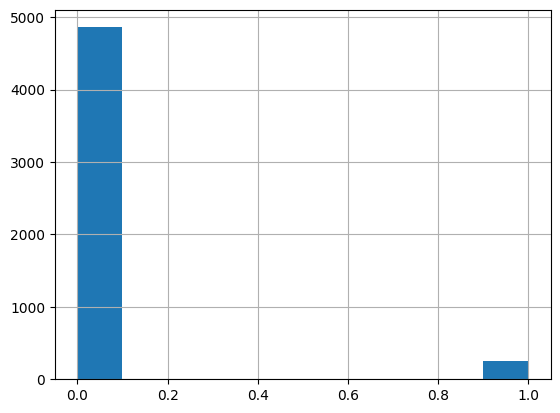

In [ ]:
# Show histogram for all columns
columns = data.columns
for col in columns:
    print("col: ", col)
    data[col].hist()
    plt.show()


In [ ]:
# Show preprocessed dataframe
data_loader.preprocess_data()
data_loader.data.head()

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,67.0,0,1,228.69,36.6,1
1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,61.0,0,0,202.21,0.0,1
2,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,80.0,0,1,105.92,32.5,1
3,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,49.0,0,0,171.23,34.4,1
4,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,79.0,1,0,174.12,24.0,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
!pip install shap
import shap

Random Forest Classifier

In [ ]:
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()

# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(7778, 21)
(1022, 21)


In [ ]:
# Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

F1 Score 0.5322285353535354
Accuracy 0.9432485322896281


SHAP for explainability

In [ ]:
# Create SHAP explainer
explainer = shap.TreeExplainer(rf)

# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,age,hypertension,heart_disease,avg_glucose_level,bmi
2813,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,43.0,0,0,91.13,33.9


In [ ]:
# Investigating the values (classification problem)

# class 0 = contribution to class 1
# class 1 = contribution to class 2

print(shap_values[0].shape)
shap_values

(1, 21)


[array([[ 9.60001190e-03,  8.22209101e-03, -9.81528612e-07,
         -1.18835344e-03, -1.39827247e-03, -4.17007543e-04,
         -3.63919598e-05,  1.87711339e-03,  7.48523792e-03,
         -3.19665540e-03,  7.18120925e-03,  6.63857276e-03,
          5.29050636e-04,  1.77058292e-02,  1.43657788e-02,
          5.19663372e-03,  2.31005968e-01,  1.23246772e-02,
          8.93717946e-03,  9.09049640e-02,  8.40062098e-02]]),
 array([[-9.60001190e-03, -8.22209101e-03,  9.81528612e-07,
          1.18835344e-03,  1.39827247e-03,  4.17007543e-04,
          3.63919598e-05, -1.87711339e-03, -7.48523792e-03,
          3.19665540e-03, -7.18120925e-03, -6.63857276e-03,
         -5.29050636e-04, -1.77058292e-02, -1.43657788e-02,
         -5.19663372e-03, -2.31005968e-01, -1.23246772e-02,
         -8.93717946e-03, -9.09049640e-02, -8.40062098e-02]])]

Take one sample of prediction for interpretation (local explanation)

In [ ]:
# Visualize local predictions
shap.initjs()

# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test[start_index:end_index])

The RF predicted: 0


Feature importance according to SHAP (global explanation)

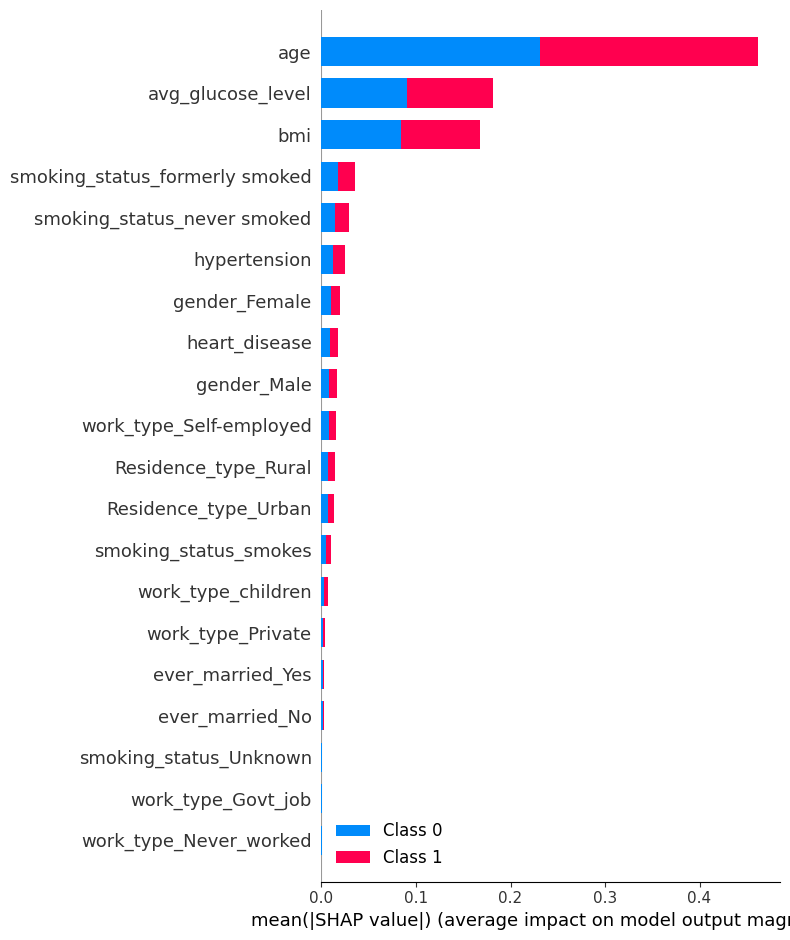

In [ ]:
# Visualize global features

# Feature summary
shap.summary_plot(shap_values, X_test)